In [54]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_protein
from Bio import SeqIO
from Bio import Phylo
import numpy as np
import matplotlib.pyplot as plt
import time

seqs = {}
for seq_rec in SeqIO.parse("seqs.fa", "fasta"):   
    seqs[seq_rec.id] = seq_rec
# Now we have a list of seqIO Objects

# print(seqs)

In [2]:
!muscle -in seqs.fa -out 2019_9_15_aligned_seqs.fa


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

seqs 48 seqs, max length 2217, avg  length 2209
00:00:00     11 MB(1%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     11 MB(1%)  Iter   1  100.00%  K-mer dist pass 2
00:00:03     83 MB(5%)  Iter   1  100.00%  Align node       
00:00:03     83 MB(5%)  Iter   1  100.00%  Root alignment
00:00:05     83 MB(5%)  Iter   2  100.00%  Refine tree   
00:00:05     83 MB(5%)  Iter   2  100.00%  Root alignment
00:00:05     83 MB(5%)  Iter   2  100.00%  Root alignment
^C:00:07     83 MB(5%)  Iter   3   35.48%  Refine biparts


In [3]:
!ls |less

19_9_11 BioE 131 Lab 1.ipynb
2019_9_15_BLAST_search.asn
2019_9_15_Lab2_Jerry_Yang.ipynb
2019_9_15_aligned_seqs.fa
2019_9_15_representativeSample.fasta
LICENSE
README.md
seqs.fa
tree.nwk
(END)

In [4]:
!fasttree -nt < 2019_9_15_aligned_seqs.fa > tree.nwk 

FastTree Version 2.1.11 Double precision (No SSE3)
Alignment: standard input
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.03 seconds
Refining topology: 22 rounds ME-NNIs, 2 rounds ME-SPRs, 11 rounds ML-NNIs
Total branch-length 0.954 after 0.45 sec2, 1 of 46 splits   
ML-NNI round 1: LogLk = -15605.734 NNIs 8 max delta 16.63 Time 0.71
Switched to using 20 rate categories (CAT approximation)1 of 20   
Rate categories were divided by 0.741 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -14232.579 NNIs 0 max delta 0.00 Time 0.86
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 3: LogLk = -14232.478 NNIs 0 max de

In [5]:
!ls

19_9_11 BioE 131 Lab 1.ipynb	      LICENSE
2019_9_15_BLAST_search.asn	      README.md
2019_9_15_Lab2_Jerry_Yang.ipynb       seqs.fa
2019_9_15_aligned_seqs.fa	      tree.nwk
2019_9_15_representativeSample.fasta


In [6]:
!less tree.nwk

((((rh.61:0.002260478,(rh.58:0.007392370,(((pi.2:0.000922101,(pi.3:0.002752320,pi.1:0.002291146)0.839:0.000908506)1.000:0.083046743,(((rh.10:0.000000005,(bb.1:0.002263659,bb.2:0.001357175)0.965:0.001808039)0.994:0.006802447,(hu.17:0.008127909,hu.6:0.001897441)0.938:0.004067558)1.000:0.030435320,(rh.2:0.028571636,(rh.40:0.013359570,(hu.67:0.001361312,(hu.37:0.000903293,((hu.40:0.000902846,hu.66:0.002259039)0.959:0.000000005,((hu.41:0.001809725,rh.38:0.001809563)0.760:0.000449605,hu.42:0.001354935)0.904:0.000000005)0.912:0.000000005)0.776:0.000445654)0.983:0.005081033)1.000:0.036653913)0.960:0.014936723)0.678:0.010489709)0.518:0.010456104,(((((cy.3:0.002763999,((cy.6:0.002763228,cy.4:0.003225292)0.994:0.000000005,(cy.5:0.002301811,rh.13:0.000459635)0.793:0.000000005)0.000:0.000000006)1.000:0.059977893,(rh.35:0.001377398,(rh.36:0.000924451,rh.37:0.001377487)0.826:0.000000005)1.000:0.032187497)1.000:0.038179383,(cy.2:0.027736913,(rh.54:0.011404269,(rh.55:0.010487788,(rh.48:0.000449307,rh.6

In [7]:
# Now, read in the tree and visualize it:

tree = Phylo.read('tree.nwk', 'newick')
# print(tree)
Phylo.draw(tree)
#next(tree)
# next(tree)

<Figure size 640x480 with 1 Axes>

In [8]:
# Visualizing using ascii:
Phylo.draw_ascii(tree)

 , rh.61
 |
 |_ rh.58
 |
 |                               , pi.2
 |           ____________________|
 |          |                    , pi.3
 |          |                    |
 |          |                    | pi.1
 |          |
 |          |           , rh.10
 |        __|          _|
 |       |  |         | , bb.1
 |       |  |         | |
 |       |  |  _______| | bb.2
 |       |  | |       |
 |       |  | |       | _ hu.17
 |       |  | |       ||
 |       |  |_|        | hu.6
 |       |    |
 |       |    |    _______ rh.2
 |       |    |   |
 |       |    |___|          __ rh.40
 |       |        |         |
 |       |        |_________|, hu.67
 |       |                  ||
 |       |                  |, hu.37
 |       |                   |
 |       |                   , hu.40
 |       |                   |
 |       |                   | hu.66
 |       |                   |
 |       |                   , hu.41
 |       |                   |
 |       |                   | rh.38
 

In [9]:
clusters = []

In [10]:
# I want to systematically find all clusters:
    # Going to use Newick package, then import the tree, then
        # find a list of all leafs s.t. its branch length is below a threshold
        
# !pip install newick
# NVM, I'm not allowed to download here

In [11]:
rep_sample = ["pi.1", "rh.10", "hu.67", "cy.6", "rh.37", "rh.48", "hu.48", "hu.31", "rh.49"]

rep_sequences = [str(seqs.get(sample_i).seq) for sample_i in rep_sample]

# print(rep_sequences)

rep_records = [seqs.get(sample_i) for sample_i in rep_sample]


In [12]:
# Writing these sequences to a file
with open("2019_9_15_representativeSample.fasta", "w") as output_handle:
    SeqIO.write(rep_records, output_handle, "fasta")

In [13]:
! ls 

19_9_11 BioE 131 Lab 1.ipynb	      LICENSE
2019_9_15_BLAST_search.asn	      README.md
2019_9_15_Lab2_Jerry_Yang.ipynb       seqs.fa
2019_9_15_aligned_seqs.fa	      tree.nwk
2019_9_15_representativeSample.fasta


In [14]:
# Results: Just the first few hits:
# (Full results can be found here: ./2019_9_15_BLAST_search.asn)

# pi.1: Adeno-associated virus isolate pi.1 capsid protein VP1 (cap) gene, complete cds
# rh.10: Non-human primate Adeno-associated virus isolate AAVrh.10 capsid protein (VP1) gene, complete cds
# hu.67: Adeno-associated virus isolate hu.67 capsid protein VP1 (cap) gene, complete cds
# cy.6: Non-human primate Adeno-associated virus isolate AAVcy.6 capsid protein (VP1) gene, complete cds
# ...

In [15]:
# Answers to questions:
# What are some ways we can analyze them and figure out what their relationship is? 
# We can look at similarities in their sequence (since DNA is a linear molecule).

# What are some properties of DNA sequences, and how can we compare them to each other? 
# They are linear sequences, and they are inherited with reasonable fidelity
    # and some error. As such, we can predict the relationship between sequences
    # and use it to compare the relationship of organisms. We can compare them
    # using string comparison algorithms.
    

# Finally, head into iPython to load and visualize your tree using Bio.Phylo. Are there any obvious clusters of sequences? 
# Yes (see ascii art)
# Are there any pairs or groups of sequences that seem very closely related? 
# Yes, you can see some regions that look like multi-forcations instead of boforcations

# Any that are any sequences that seem far more distantly related than the others? 
# Yes, namely rh.61 and the {rh.57, ...} cluster appear to be outgroups

# Answer to question: Why no trust BLAST 

# What are some of the most common matches for each cluster? Write them down in your lab notebook. 
# (See above)

# Do they all match the same gene? Are there any that definitely do not match the others? 
# They all appear to match the protein VP1 of the Adeno-Associated Virus

# Why might we not trust the annotations for sequences that come up in our BLAST? 
# BLAST can only search against known sequences. 
# Depending on the level of match, it may be giving us inaccurate results. For example,an 80% match to 
# a different organism may not be enough evidence to conclude that our sequence is from that organism

# *Finding the GC Content for all of them sequences*

In [16]:
rep_seq_dict = {seqs.get(sample_i).id:str(seqs.get(sample_i).seq) for sample_i in rep_sample}
# Creates a dictionary mapping each id to each sequence for the representative subset
# rep_seq_dict

full_seq_dict = {seqs.get(sample_i).id:str(seqs.get(sample_i).seq) for sample_i in [record.id for record in seqs.values()]}
# print(full_seq_dict)
# God this is ugly. Forgive me father for I have sinned

In [17]:
rep_seq_GC = {seqs.get(sample_i).id:str(seqs.get(sample_i).seq) for sample_i in rep_seq_dict}

In [18]:
def getSequence(id, refDict):
    """ Function to get the sequence given an id"""
    return str(refDict.get(id))  

In [19]:
clusters = {    "c1": ["pi.2", "pi.3", "pi.1"], 
                "c2": ["rh.40", "hu.37", "hu.66", "hu.40", "hu.41", "rh.38", "hu.42"],
                "c3": ["cy.3", "cy.6", "cy.4", "cy.5", "rh.13"],
                "c4": ["rh.35", "rh.36", "rh.37"]
           }

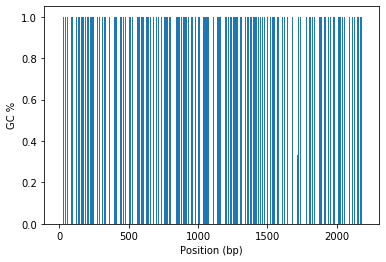

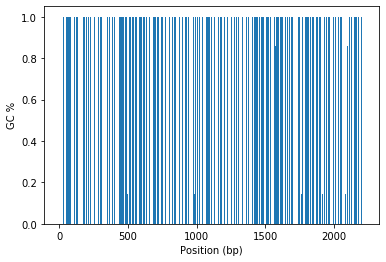

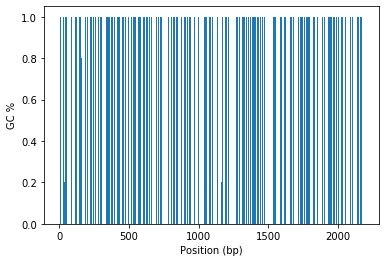

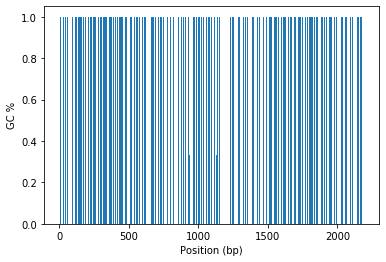

In [62]:
for cName in clusters.keys():
    ids = clusters.get(cName)
    sequences = {}
    # print(ids)
    for i in ids:
        sequences[i] = getSequence(i, full_seq_dict)
    # print(sequences)
    zipped_sites = zip(*sequences.values())
    # print(list(zipped_sites))
    
    gc_per_site = [calc_GC(site) for site in zipped_sites]
    ind = np.arange(len(gc_per_site)) 
    plt.bar(x = ind, height = gc_per_site)
    plt.xlabel("Position (bp)")
    plt.ylabel("GC %")
    plt.show()
    # time.sleep(1)
    # plt.bar()
    # print(gc_per_site)
    # print((cName, ids))

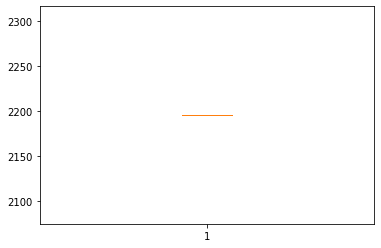

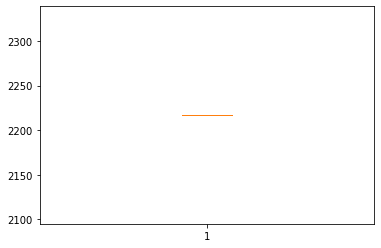

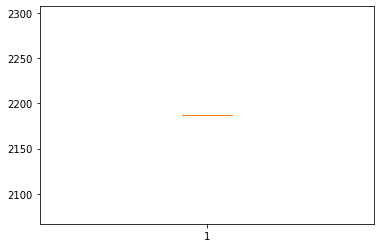

In [ ]:
for cName in clusters.keys():
   
    ids = clusters.get(cName)
    sequences = {}
    # print(ids)
    for i in ids:
        sequences[i] = getSequence(i, full_seq_dict)
    # print(sequences)
    # zipped_sites = zip(*sequences.values())
    # print(list(zipped_sites))
    
    lens = [len(s) for s in sequences.values()]
    # ind = np.arange(len(gc_per_site)) 
    plt.boxplot(lens)
    
    plt.show()

In [21]:
# seqs

In [22]:
def calc_GC(sites):
    gc_count = 0
    total = 0
    for letter in sites:
        if (letter == 'g' or letter == 'c'):
            gc_count += 1
        total += 1
    return gc_count/total
        
